# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [ ]:
# Analysis

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_df = pd.DataFrame(study_results)
mouse_df = pd.DataFrame(mouse_metadata)
merged_df = pd.merge(study_df,mouse_df,on='Mouse ID')

# Display the data table for preview
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(merged_df['Mouse ID'].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = merged_df[merged_df.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
duplicates['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
dirty_df = merged_df[merged_df['Mouse ID'] == 'g989']
dirty_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df['Mouse ID'] != 'g989']
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

grouped_mean_df = pd.DataFrame(clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean())
grouped_mean_df.rename(columns={'Tumor Volume (mm3)': 'Mean Tumor Volume'},inplace=True)
grouped_median_df = pd.DataFrame(clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median())
grouped_median_df.rename(columns={'Tumor Volume (mm3)': 'Median Tumor Volume'},inplace=True)
grouped_var_df = pd.DataFrame(clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var())
grouped_var_df.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Variance'},inplace=True)
grouped_std_df = pd.DataFrame(clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std())
grouped_std_df.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Std. Dev.'},inplace=True)
grouped_sem_df = pd.DataFrame(clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem())
grouped_sem_df.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Std. Err.'},inplace=True)

grouped_merged = pd.merge(grouped_mean_df,grouped_median_df, on='Drug Regimen')
grouped_merged = pd.merge(grouped_merged,grouped_var_df, on='Drug Regimen')
grouped_merged = pd.merge(grouped_merged,grouped_std_df, on='Drug Regimen')
grouped_merged = pd.merge(grouped_merged,grouped_sem_df,on='Drug Regimen')

grouped_merged

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [31]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
grouped_merged_agg = pd.DataFrame(clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem']))
grouped_merged_agg.style.set_caption('Tumor Volume (mm3)')

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

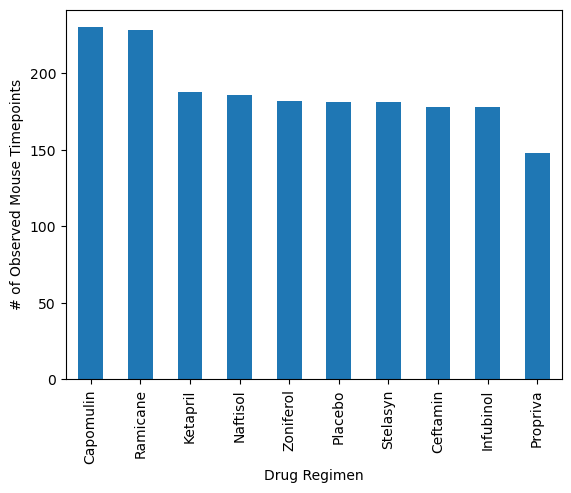

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_df_pd_bar = pd.DataFrame(clean_df.groupby('Drug Regimen').size().sort_values(ascending=False))
clean_df_pd_bar.plot(kind = 'bar', ylabel = '# of Observed Mouse Timepoints',legend=False)

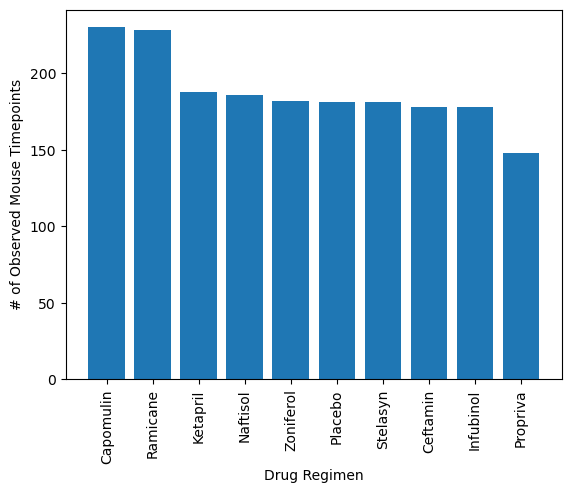

In [33]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt_bar_data = clean_df.groupby('Drug Regimen').size().sort_values(ascending=False)
plt.bar(plt_bar_data.index,height=plt_bar_data)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

array([<Axes: ylabel='count'>], dtype=object)

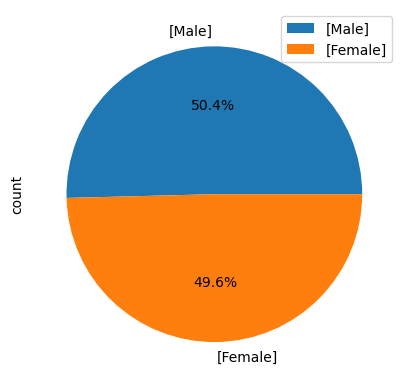

In [34]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
clean_df_pd_pie = pd.DataFrame(clean_df.groupby('Mouse ID')['Sex'].unique().value_counts())

# Make the pie chart
clean_df_pd_pie.plot(kind='pie',ylabel='count',autopct='%1.1f%%',subplots=True)


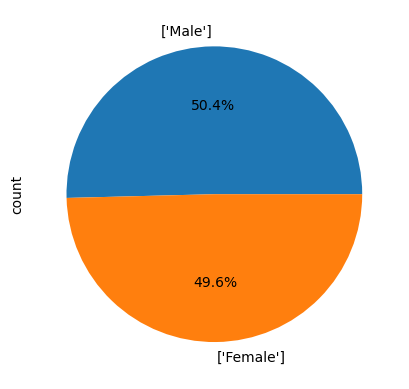

In [35]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
plt_pie_data = clean_df.groupby('Mouse ID')['Sex'].unique().value_counts()

# Make the pie chart
plt.pie(plt_pie_data,labels=plt_pie_data.index,autopct='%1.1f%%')
plt.ylabel('count')
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_volume_df = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_volume_df = pd.merge(last_volume_df,clean_df,on=['Mouse ID','Timepoint'])

merged_volume_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
results_list = []
array_list = []
outliers_list = []
outliers_final_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for x in range(len(treatments)):
    # Locate the rows which contain mice on each drug and get the tumor volumes
    results_list.append(pd.DataFrame(merged_volume_df[merged_volume_df['Drug Regimen'] == treatments[x]]))
    array_list.append(np.array(results_list[x]['Tumor Volume (mm3)']))
    q75, q25 = np.percentile(array_list[x],[75,25])
    iqr = q75 - q25
    lower_bound = q25 - 1.5*iqr
    upper_bound = q75 + 1.5*iqr

    # add subset
    # Determine outliers using upper and lower bounds
    outliers_list.append(results_list[x]['Tumor Volume (mm3)'] < lower_bound)
    outliers_final_list.append(results_list[x][outliers_list[x] == True])
    print(f"{treatments[x]}'s potential outliers : {outliers_final_list[x]['Tumor Volume (mm3)']}")

Capomulin's potential outliers : Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers : Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers : 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers : Series([], Name: Tumor Volume (mm3), dtype: float64)


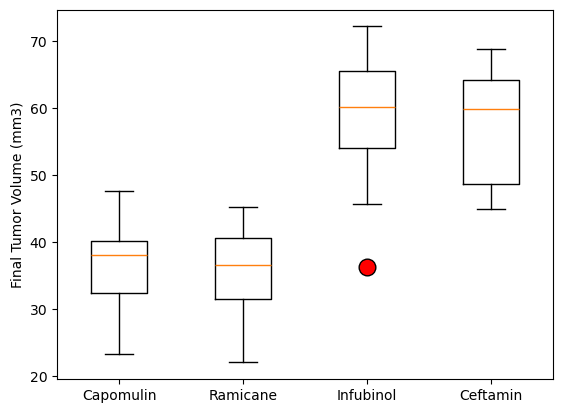

In [37]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.boxplot(array_list, flierprops=dict(marker='o', markerfacecolor='red', markersize=12))
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1,2,3,4],treatments)
plt.show()

## Line and Scatter Plots

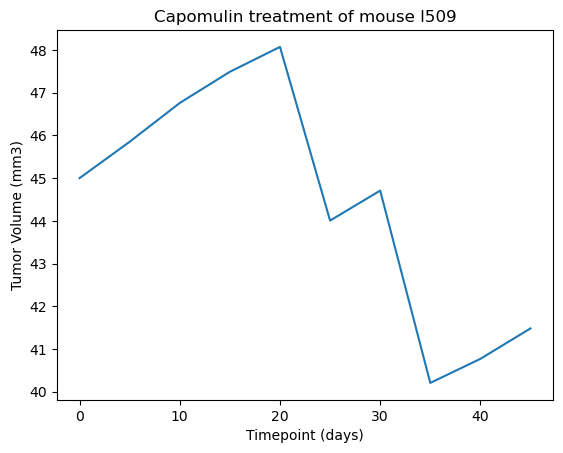

In [40]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse = clean_df[clean_df['Mouse ID'] == 'l509']
plt.plot(single_mouse['Timepoint'],single_mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

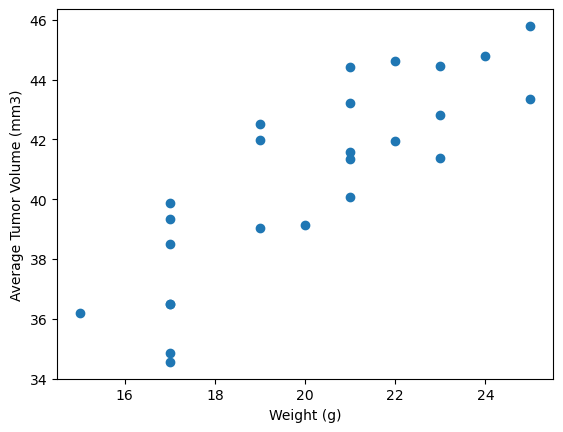

In [42]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
capomulin_mouse_ids = capomulin_df['Mouse ID'].unique()
avg_tumor_volume = []
weight_list = []

# capomulin_df

for x in range(len(capomulin_mouse_ids)):
    avg_tumor_volume.append(capomulin_df[capomulin_df['Mouse ID'] == capomulin_mouse_ids[x]]['Tumor Volume (mm3)'].mean())
    weight_list.append(capomulin_df[capomulin_df['Mouse ID'] == capomulin_mouse_ids[x]]['Weight (g)'].mean())

plt.scatter(weight_list,avg_tumor_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


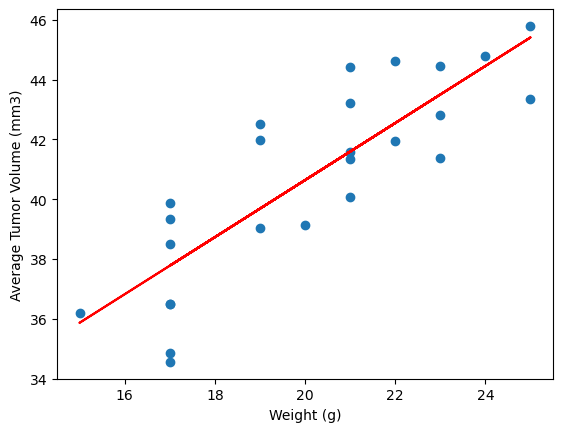

In [43]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(weight_list,avg_tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight_list,avg_tumor_volume)
regress_values = np.array(weight_list) * slope + intercept
plt.scatter(weight_list,avg_tumor_volume)
plt.plot(weight_list,regress_values,"r-")
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()